In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df=pd.read_excel('http://taanila.fi/Concrete_Data.xlsx')

In [2]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [4]:
#Betonin iän päivissä vaikutus lujuuteen, joku piru jättänyt välilyönnin perään.
X=df['Age (day)'].to_frame()
y=df['Concrete compressive strength(MPa, megapascals) ']

In [5]:
from sklearn.linear_model import LinearRegression
malli = LinearRegression()
malli.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
malli.intercept_

31.846436479515994

In [7]:
malli.coef_

array([0.08697358])

In [8]:
malli.score(X,y) #ei ikä paljoaa selitä

0.10816006502079256

C:\Users\jukka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


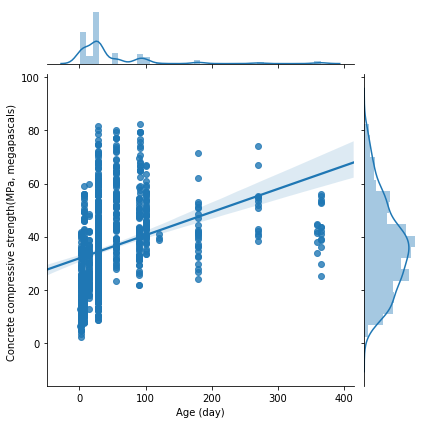

In [9]:
sns.jointplot(data=df, x='Age (day)', y='Concrete compressive strength(MPa, megapascals) ', kind='reg')

In [10]:
X1=df['Cement (component 1)(kg in a m^3 mixture)'].to_frame()
y1=df['Concrete compressive strength(MPa, megapascals) ']
malli = LinearRegression()
malli.fit(X1,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
malli.score(X1,y1)

0.24783741936758183

C:\Users\jukka\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


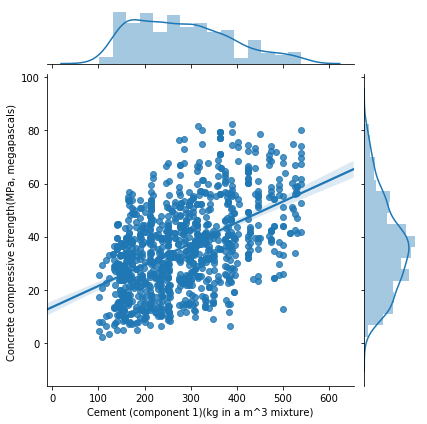

In [12]:
sns.jointplot(data=df, x='Cement (component 1)(kg in a m^3 mixture)', y='Concrete compressive strength(MPa, megapascals) ', kind='reg')

In [13]:
malli.predict(pd.DataFrame([50, 350, 600]))

array([17.42177354, 41.29564554, 61.19053887])

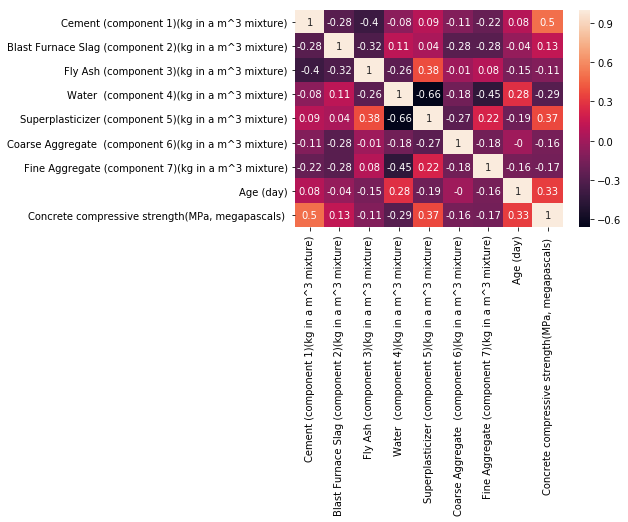

In [14]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [17]:
X2=df[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)']]
y2=df['Concrete compressive strength(MPa, megapascals) ']
malli=LinearRegression()
malli.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
malli.coef_

array([0.06883552, 1.11164956, 0.09789979])

In [20]:
malli.intercept_

5.097652443799831

In [21]:
malli.score(X2,y2)

0.48164867380869714

In [23]:
X3=df[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Age (day)','Water  (component 4)(kg in a m^3 mixture)']]
y3=df['Concrete compressive strength(MPa, megapascals) ']
malli=LinearRegression()
malli.fit(X3,y3)
malli.score(X3,y3)

0.49860295442607266

Text(0, 0.5, 'Deviation')

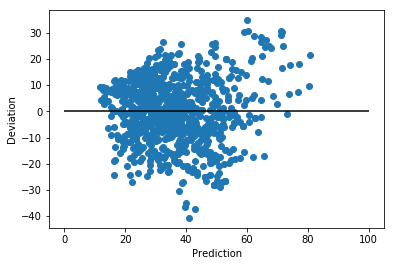

In [26]:
plt.scatter(malli.predict(X3), malli.predict(X3)-y3)

plt.hlines(y=0,xmin=0,xmax=100)

plt.xlabel('Prediction')
plt.ylabel('Deviation')

Text(0, 0.5, 'Deviation')

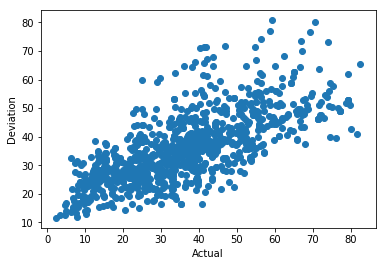

In [29]:
plt.scatter(df['Concrete compressive strength(MPa, megapascals) '], malli.predict(X3))

plt.xlabel('Actual')
plt.ylabel('Deviation')

In [30]:
import statsmodels.api as sm

X3 = sm.add_constant(X3)
malli_sm = sm.OLS(y3, X3)
results = malli_sm.fit()
print(results.summary())

                                           OLS Regression Results                                           
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.499
Model:                                                          OLS   Adj. R-squared:                  0.497
Method:                                               Least Squares   F-statistic:                     254.8
Date:                                              Thu, 30 May 2019   Prob (F-statistic):          5.65e-152
Time:                                                      15:45:04   Log-Likelihood:                -4005.7
No. Observations:                                              1030   AIC:                             8021.
Df Residuals:                                                  1025   BIC:                             8046.
Df Model:                                                         4                                         
Covariance Type:   

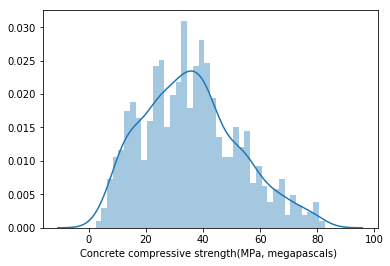

In [35]:
sns.distplot(df['Concrete compressive strength(MPa, megapascals) '], bins=40)

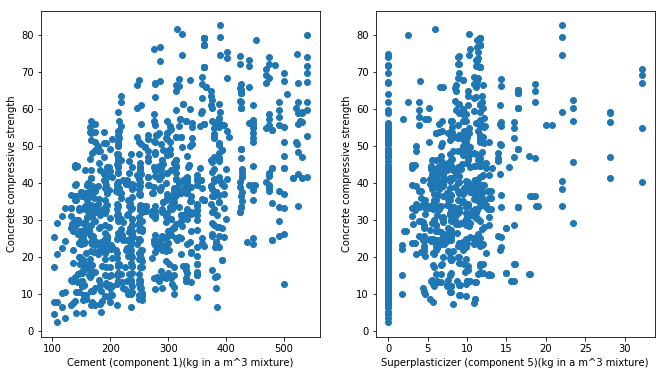

In [43]:
features = ['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)']
target = df['Concrete compressive strength(MPa, megapascals) ']
plt.figure(figsize=(11, 6))
for i, feature in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    plt.scatter(df[feature],target)
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength')

In [46]:
X4 = df[['Cement (component 1)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)']] 
y4 = df['Concrete compressive strength(MPa, megapascals) ']
from sklearn.model_selection import train_test_split

In [49]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state=5)

print(X4_train.shape)
print(X4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(824, 2)
(206, 2)
(824,)
(206,)


In [50]:
malli.fit(X4_train, y4_train)

8.192886464334961

In [57]:
from sklearn.metrics import mean_squared_error

y4_train_predict = malli.predict(X4_train)
rmse = (np.sqrt(mean_squared_error(y4_train, y4_train_predict)))
r2 = malli.score(X4_train,y4_train)

print('Sopivuus opetusdataan')
print("=================================")
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))
print("\n")

y4_test_predict = malli.predict(X4_test)
rmse = (np.sqrt(mean_squared_error(y4_test, y4_test_predict)))
r2 = malli.score(X4_test, y4_test)

print('Sopivuus testidataan')
print('=================================')
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))

Sopivuus opetusdataan
Keskivirhe: 13.54606689084437
Selityskerroin: 0.366972034303492


Sopivuus testidataan
Keskivirhe: 13.08627928697203
Selityskerroin: 0.2698392272975554


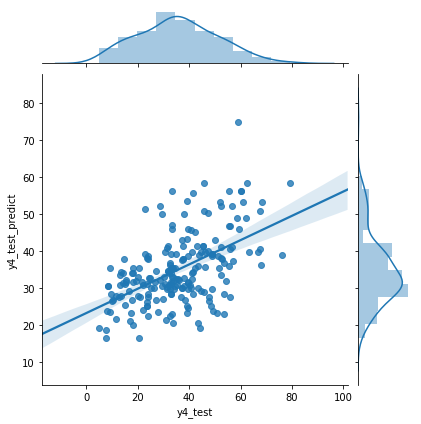

In [60]:
test = pd.DataFrame()
test['y4_test'] = y4_test
test['y4_test_predict'] = y4_test_predict
sns.jointplot(data=test, x='y4_test',y='y4_test_predict',kind='reg')